In [1]:
# Data import
import pandas as pd

# Data Manipulation
import numpy as np

# plot 
import matplotlib.pyplot as plt

# Time series
import statsmodels.api as sm


In [2]:
# File name
vix_file = '^VIX.csv'
bitcoin_file = 'BTC-USD.csv'

In [8]:
# Import file
bitcoins = pd.read_csv(bitcoin_file)

In [9]:
# Calculate log return
bitcoins['log return'] = np.log(bitcoins['Close']) - np.log(bitcoins['Close'].iloc[0])

In [10]:
bitcoins

Date          Open          High           Low         Close  \
0     9/17/2014    465.864014    468.174011    452.421997    457.334015   
1     9/18/2014    456.859985    456.859985    413.104004    424.440002   
2     9/19/2014    424.102997    427.834991    384.532013    394.795990   
3     9/20/2014    394.673004    423.295990    389.882996    408.903992   
4     9/21/2014    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2696   2/3/2022  36944.804690  37154.601560  36375.539060  37154.601560   
2697   2/4/2022  37149.265630  41527.785160  37093.628910  41500.875000   
2698   2/5/2022  41501.480470  41847.164060  41038.097660  41441.164060   
2699   2/6/2022  41441.121090  42500.785160  41244.906250  42412.433590   
2700   2/7/2022  42351.128910  44385.917970  41754.324220  44127.917970   

         Adj Close        Volume  log return  
0       457.334015  2.105680e+07    0.000000  
1       424.440002  3.448320e+07   -0.074643  
2       394.795990  3.791970e+07   -0.147045  
3       408.903992  3.686360e+07   -0.111934  
4       398.821014  2.658010e+07   -0.136901  
...            ...           ...         ...  
2696  37154.601560  1.859153e+10    4.397429  
2697  41500.875000  2.941221e+10    4.508056  
2698  41441.164060  1.965285e+10    4.506616  
2699  42412.433590  1.614210e+10    4.529783  
2700  44127.917970  2.958189e+10    4.569434  

[2701 rows x 8 columns]

In [11]:
bitcoins_date = bitcoins['Date'][1:].to_numpy()
bitcoins_logReturn = bitcoins['log return'][1:].to_numpy()

Text(0.5, 1.0, ' Bitcoins - Histogram')

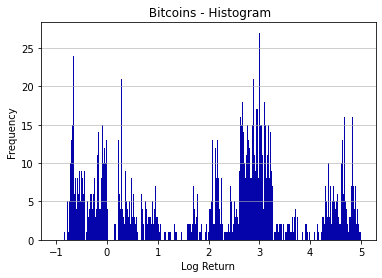

In [12]:
n, bins, patches = plt.hist(x=bitcoins_logReturn, bins=np.arange(-1, 5, 0.01), color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title(' Bitcoins - Histogram')

# The Jarque-Bera test of normality

The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. The test statistic is based on two moments of the data, the skewness, and the kurtosis, and has an asymptotic  Chi-square distribution.

$$ JB = n(S^{2}/6 + (K-3)^{2}/24)$$



In [8]:
print('JB - The Jarque-Bera test statistic: ', round(sm.stats.stattools.jarque_bera(bitcoins_logReturn)[0],2))
print('JBpv - The pvalue of the test statistic: ', sm.stats.stattools.jarque_bera(bitcoins_logReturn)[1])
# A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.
print('skew - Estimated skewness of the data: ', round(sm.stats.stattools.jarque_bera(bitcoins_logReturn)[2],2))
print('kurtosis - Estimated kurtosis of the data: ', round(sm.stats.stattools.jarque_bera(bitcoins_logReturn)[3],2))

JB - The Jarque-Bera test statistic:  172.36
JBpv - The pvalue of the test statistic:  3.742772523016971e-38
skew - Estimated skewness of the data:  -0.14
kurtosis - Estimated kurtosis of the data:  1.8


In [9]:
# Appendix about p-value: 
# https://www.investopedia.com/terms/p/p-value.asp#:~:text=of%20P%2DValue-,What%20Is%20P%2DValue%3F,the%20null%20hypothesis%20is%20correct.

    
 #https://www.statsmodels.org/dev/examples/index.html#time-series-analysis

# 1 - Autocorrelation Function (ACF)

Consider a weakly stationary return series $r_{t}$

It is defined ACF:
$$ \rho_{l} = \frac{Cov(r_{t},r_{t-l})}{\sqrt[]{Var(r_{t})VAR(r_{t-l})}}$$

It is possible to estimate with:
$$ \rho_{l} = \frac{\sum_{t=l+1}^{T}(r_{t}-\overline{r})(r_{t-1}-\overline{r})}{\sum_{t=l+1}^{T}(r_{t}-\overline{r})^{2}}, 0\leq l<T-1$$

## 1.1 - Testing Individual ACF

Hypothesis test.

$H_{0}: \rho_{l}=0 \\$
$H_{a}:\rho_{l}\neq 0$

$$t-ratio = \frac{\hat{\rho}_{l}}{\sqrt[]{(1+2\sum_{i=1}^{l-1}\overline{\rho}^{2}_{l})/T}}$$

If the serie of the return is a stationary Gaussian satisfying $\rho_{j}=0$ for $j>l$, the test is asymptotically distributed as a standard normal random variable.

$H_{0}$ is rejected if $|t-ratio|>Z_{\alpha/2}$ (percentile of the standard normal distribution)

## 1.2 - Portmanteau Test

In order to test jointly several autocorrelations of $r_{t}$ are zero.
Ljung-Box test of autocorrelation in residuals.

$\circ$ Box and Pierce (1970) 

$$Q^{*}(m) = T \sum_{l=1}^{m} \hat{\rho}_{l}^{2} $$

$H_{0}: \rho_{1}=...\rho_{m}=0 \\$
$H_{a}:\rho_{i}\neq 0$ for some $i \in {1,...,m}$

Under the assumption that $r_{t}$ is an iid sequence with certain moment condition, $Q^{*}(m)$ is a chi-quared random variable with m degrees of freedom ($Q(m)>\chi_{\alpha}^{2}$ with $\alpha$ percentile of a chi-squared distribution). 

Ljung and Box (1978) better than Box and Pierce (1970) for finite sample test.

$\circ$ Ljung and Box (1978)

$$Q(m) = T(T + 2)\sum_{l=1}^{m} \frac{\hat{\rho}_{l}^{2}}{T-l} $$

$$m \approx ln(T)$$

# 2 - White Noise and Linear Time Series

## 2.1 - White Noise

A time series is considered a white noise if the series is idenpendent and identically distributed randomly with a finite mean and variance. If the series is normally distribute with mean zero and variance $\sigma^{2}$, this serie is called Gaussian white noise.

A Whrite noise series have all the ACFs equal to zero

## 2.2 - Linear Time Series

A time series $r_{t}$ is linear if it can be written as:
$$r_{t}=\mu + \sum_{t=0}^{\infty}\psi_{i}a_{t-i}$$

where $\mu$ is the mean of $r_{t}$, $\psi_{0}=1$, and ${a_{t}}$ is a iid random variable with mean zero and a we;;-defined distribution.

If $r_{t}$ is weakly stationary, we can obtain its mean and variance using the independence of $a_{t}$ as:

$$E(r_{t})=\mu, \quad  Var(r_{t})=\sigma_{a}^{2}\sum_{i=0}^{\infty}\psi_{i}^{2}$$

Because $Var(r_{t})<\infty, \quad {\psi_{i}^{2}}$ must be a convergent series, it implicates that $\psi_{i}^{2} \rightarrow 0$ and $i \rightarrow \infty$ (STATIONARITY)

## 2.3 - Stationarity

A serie is considered stationary if the absolute values for all roots(characteristic equation) are less then one.

Characteristic equation of the model for the model $AR(p)$:
$$(1-\phi_{1}B-\phi_{2}B^{2}-...--\phi_{p}B^{p})\rho_{l}=0, \quad for \quad l>0$$

# 3 - Identifying AR Model in Practice

## 3.1 - Partial Autocorrelation Function (PACF)

PACF of a stationary time series is a function of its ACF is a useful tool for determining the order $p$ of an $AR model$.

$$r_{t} = \phi_{0,p}+\phi_{1,p}r_{t-1}+...+\phi_{p-1,p}r_{t-p-1}+\phi_{p,p}r_{t-p}+e_{pt}$$

Properties of the model $AR(p)$: 

1 - $\hat{\phi}_{p,p}$ converges to $\phi_{p}$ as the sample size $T$ goes to infinity.

2 - $\hat{\phi}_{l,l}$ converges to zero to all $l>p$.

3 - The asymptotic variance of $\hat{\phi}_{l,l}$ is $1/T$ for $l>p$.

## 3.2 - Information Criteria

Information criteria is used to determine the order $p$ of an $AR$ process. There are many differents criterias, but all of them are based on likelihood minimization.

$\circ$ Akaike Information Criterion (AIC) - Akaike, 1973:

$AIC(l) = ln(\tilde{\sigma}^{2}_{l})+\frac{2l}{T}$

$\circ$ (Schwarz) Bayesian Information Criterion (BIC):

$BIC(l) = ln(\tilde{\sigma}^{2}_{l})+\frac{l \ln(T)}{T}$

## 3.3 - Model Checking

The residual series should behave as a white noise. ACF and Ljung-Box test of the residuals can be used in order to check the closeness of $\hat{a}_{t}$ to a white noise

## 3.4 - Good Fitness

A common measure of a stationary model is the $R-square$ $(R^{2})$ values between zero and 1:

$$R^{2}=1-\frac{Residual sum of squares}{Total sum of squares}$$

$$R^{2}=1-\frac{\sum_{t=p+1}^{T}\hat{a}^{2}_{t}}{\sum_{t=p+1}^{T}(r_{t}-\overline{r})^2}$$

Usually, a large value for $R^{2}$ indicates that the model provides a closer fit to the data. However, this is only true for a stationary time series.

Since $R^{2}$ is a nondecreasing function of the number of parameters used. It was adjusted the R-Square test.

$$Adj-R^{2}= 1- \frac{Variance of residuals}{Variance of r_{t}}$$

$$Adj-R^{2}= 1- \frac{\hat{\sigma}^{2}_{a}}{\hat{\sigma}^{2}_{r}}$$

This new adjustment takes into account the number of parameters used in the fitted model. However, the new measure is no longer between 0 and 1.

# 4 - Simple Moving-Average Models

One approach is to treat the model as a simple extension of white noise series.
Another approach is to treat the model as an infinite-order AR model with some parameter constraints

AR model with infinite order:
$$r_{t} = \phi_{0}+\phi_{1}r_{t-1}+\phi_{2}r_{t-2}+...+a_{t}$$

In order to make the model more practical, it is assumed that the coefficiente $\phi_{i}$ satisfy some constraints so that they are determined by a finite number of parameters:
$$r_{t} = \phi_{0}-\theta_{1}r_{t-1}-\theta_{1}^{2}r_{t-2}-\theta_{1}^{3}r_{t-3}-...+a_{t}$$

Where $\phi_{i}=\theta_{1}^{i}$ for $i \geq i$.
The coefficient should be $|\theta_{i}|<1$ ($\textit{invertible}$)to guarantee the stationarity of the model.

Multiplying the equation by $\theta_{1}$ and subtracting the original equation, it is obtained:

$$r_{t}=\phi_{0}(1-\theta_{i})+a_{t}-\theta_{1}a_{t-1}$$

This model is a weighted average of shocks $a_{t}$ and $a_{t-1}$. Therefore, the model is called an MA model of order 1:
$$r_{t}=c_{0}+a_{t}-\theta_{1}a_{t-1}$$

It is possible to extend the model for $q$ coefficients.
$$r_{t}=c_{0}+a_{t}-\theta_{1}a_{t-1}-...-\theta_{q}a_{t-q}$$

## 4.1 - Stationarity

MA models are always weakly stationary because they are finite linear combination of a white noise sequence.

$$E(r_{t}) = c_{0}$$

$$Var(r_{t})=(1+\theta_{1}^{2}+\theta_{2}^{2}+...+\theta_{q}^{2})\sigma_{a}^{2}$$

Both equations are time-invariant

## 4.2 - Autocorrelation Function

Considering an MA(1) model with $c_{0}=0$. Multiplying the model by $r_{t-l}$:

$$r_{t-l}r_{t}=r_{t-l}a_{t}-\theta_{1}r_{t-l}a_{t-1}$$

Taking expectation:

$$\gamma_{1}=-\theta_{1}\sigma_{a}^{2}, \quad \gamma_{l}=0, \quad for\enspace l>1 $$

Autocorrelation function can help to find the lags in the MA model

## 4.3 - Estimation

It is common to use Maximum Likelihood to estimate the parameter of an MA model. There are two approaches used.

1- This approache consider that the initial shocks ($i.e.,\enspace a_{t} \enspace for \enspace t \leq 0$) are zero. As such, the shocks needed in likelihood function calculation are obtained recursively from the model.

2- The second approach treats the initial shocks $a_{t}$, $t\leq0$, as additional parameters of the model and estimates them joinly with other parameters

## 4.4 - Forecasting Using MA Models

The model has finite memory, its point forecast go to the mean of the series quickly

$$ r_{h+1}=c_{0}+a_{h+1}-\theta_{1}a_{h}$$

Taking the conditional expectation:

$$\hat{r}_{h}(1)=E(r_{h+1}/F_{h}= c_{0}-\theta_{1}a_{h})$$

$$e_{h}(1)=r_{h+1}-\hat{r}_{h}(1)=a_{h+1}$$

Where $h$ is the forecast origin and $F_{h}$ denote the information available at time $h$.

For the 2-step of forecast:

$$r_{h+2}=c_{0}+a_{h+2}-\theta_{1}a_{h+1}$$

calculating the conditional expectation:

$$\hat{r}_{h}^{2}=E(r_{h+2}/F_{h})=c_{0}$$

$$e_{h}(2)=r_{h+2}-\hat{r}_{h}(2)=a_{h+2}-\theta_{1}a_{h+1}$$

# 5 - Simple ARMA models

Ther ARMA model was introduced by Box, Jenkins, and Reinsel (1994).
The basic ARMA model has 1 component AR and 1 component MAR, it is possible to see below the model:

$$r_{t}-\phi_{1}r_{t-1}=\phi_{0}+a_{t}-\theta_{1}a_{t-1}$$

where $\{a_{t}\}$ is white noise series.

## 5.1 - Identifying ARMA Models

Tsay and Tiao (1984) propose a new approach that uses the extended autocorrelation function (EACF) to specify the parameter of the ARMA process.
The output of the EACF is two-way table where the rows correspond to AR order p and the columns to MA order q.

The table has two types of elements:

1 - "X" Denotes that the absolute value of the corresponding EACF is $\boldsymbol{greater}$ than or equal to $2/\sqrt{T}$, which is twice the asymptotic standard error of the EACF.

2 - "O" denotes that the corresponding EACF is $\boldsymbol{less}$ than $2/\sqrt{T}$ in modulus.

The simple (lower number of componentes) from the element "O" is the best configuration for the model ARMA.

The information criteria can also be used to select ARMA models. The configuration with the minimun information criteria is the best configuration for the ARMA model.

Ljung-Box statistic of the residuals can be used to check the adquacy of a fitted model. I f the model is correctly specified, then $Q(m)$ follows asymptotically a chi-squared distribution with $m - g$ degrees of freedom, where $g$ denotes the number of parameters used in the model.

# 6 Unit-Root Nonstationarity

For series like price, the nonstationarity is mainly due to the fact that there is no fixed level for the price. In the time series literature, such a nonstationarity series is called unit-root nonstationarity time series.

## 6.1 - Random Walk

A time series ${p_{t}}$ is a random walk if it satisfies:

$$p_{t}=p_{t-1}+a_{t},$$

Where $p_{0}$ is a real number denoting the starting value of the process and $\{a_{t}\}$ is a white noise series. $p_{t}$ can be the log price of a particular stock at date t.

Random Walk is not a AR(1) model because there is a root unity, which does not satisfy the weak stationarity condition.

Forecast the 1-step ahead of the model in the origin $h$.

$$\hat{p}_{h}(1)=E(p_{h+1}|p_{h},p_{h-1},...)=p_{h}$$

The 1-step ahead forecast is the same value in the origin. Let's calculate the 2-step ahead of the model.

$$\hat{p}_{h}(2)=E(p_{h+2}|p_{h},p_{h-1},...)=E(p_{h+1}+a_{h+2}|p_{h},p_{h-1},...)=E(p_{h+1}|p_{h},p_{h-1},...)=p_{h}$$

In fact, for any forecast horizon $l>0$, we have

$$\hat{p}_{h}(l)=p_{h}$$

The eror of the model for the l-step ahead forecast is

$$e_{h}(l)=a_{h+l}+...+a_{h+1}$$,

so that $Var[e_{h}(l)]=l\sigma_{a}^{2}$ which diverges to infinity when $l$ tend to infinity.

This resul says that the usefulness of point forecast $\hat{p}_{h}(l)$ diminishes as $l$ increases. Theoretically, this mean that $p_{t}$ can assume any real value for a sufficiently large t.

## 6.2 - Random Walk with Drift

Some markt indexs have the log return series with a small and positive mean. This implies that the model for the log price is

$$p_{t}=\mu+p_{t-1}+a_{t}$$

where $\mu=E(p_{t}-p_{t-1})$ and $\{a_{t}\}$ is a white noise series.

$p_{1}=\mu+p_{0}+a_{1}, \\ $

$p_{2}=\mu+p_{1}+a_{2}=2\mu+p_{0}+a_{2}+a_{1}, \\ $

$p_{t}=t\mu+p_{0}+a_{t}+a_{t-1}+...+a_{2}+a_{1}$

The last equation show that the log price consist of trend proportional to the time $t\mu$ and a pure random-walk process $\sum_{i=1}^{t}a_{i}$. The variance of the forecast goes to infinity $VAR(\sum_{i=1}^{t}a_{i})=t\sigma_{a}^{2}$

$\boldsymbol{Mean\enspace and\enspace variance\enspace time\enspace dependent}$

## 6.3 - Trend-Stationary Time Series

This model has a linear trend and it is considered a trend-stationary time series model,

$$p_{t}=\beta_{0}+\beta_{1}t+r_{t}$$

where $r_{t}$ is a stationary time series (a stationary AR(p)).
The means of this model is $E(p_{t})=\beta_{0}+\beta_{1}t$ and the variance $Var(p_{t})=Var(r_{t})$.

$\boldsymbol{Mean\enspace and\enspace variance\enspace time\enspace independent}$

Trend-Stationary Time Series model can be transformed into a stationary one by removing the time trend via a simple linear regression analysis.

# 7 - Unit-Root Test

To test whether the log price $p_{t}$ of an asset follows a random walk or a random walk with drift, we employ the models

$$p_{t}=\phi_{1}p_{t-1}+e_{1}$$

$$p_{t}=\phi_{0}+\phi_{1}p_{t-1}+e_{1}$$

where $e_{t}$ denotes the error term, and consider the null hypothesis

$H_{0}: \phi_{1}=1 \\$ 
$H_{a}:\phi_{1}<1$

This is the well-known unit-root testing problem: see Dickey and Fuller (1979).
A common statistic is the t-ratio of the least squares (LS) estimate of $\phi_{1}$. The LS method gives
$$\hat{\phi_{1}}=\frac{\sum_{t=1}^{T}p_{t-1}p_{t}}{\sum_{t=1}^{T}p_{t-1}^{2}}\enspace \hat{\sigma_{e}}^{2}=\frac{\sum_{t=1}^{T}(p_{t}-\hat{\phi}_{1}p_{t-1})^{2}}{T-1}$$

where $p_{0}=0$ and $T$ is the sample size. The t-ratio is
$$DF \equiv t-ratio = \frac{\hat{\phi}_{1}-1}{std(\hat{\phi}_{1})}=\frac{\sum_{t=1}^{T}p_{t-1}e_{t}}{\hat{\sigma}_{e}\sqrt{\sum_{t=1}^{T}p_{t-1}^{2}}}$$

This test is commonly referred to as the Dickey-Fuller test. If the serie $\{e_{t}\}$ is a white noise with finite moments of order slightly greater than 2, then the DF-statistic converges to a function of the standard Brownian motion as $T \to \infty$ see Chan and Wei (1988) and Philips (1987).

The unit-root DF is a test for a model with 1 lag, in order to have a unit-root test for a more complex models, the Augmented Dickey-Fuller was created. This unit-test is applied for the following model

$$x_{t}=c_{t}+\beta x_{t-1}+\sum_{i=1}^{p-1}\phi_{i} \Delta x_{t-i} + e_{t}$$

where $c_{t}$ is a deterministic function of the time index $t$ and $\Delta x_{j}=x_{j}-x_{j-1}$

The $t-ratio$ of $\hat{\beta}-1$:

$H_{0}: \beta_{1}=1 \\$ 
$H_{a}:\beta_{1}<1$

$$ADF-test = \frac{\hat{\beta}-1}{std(\hat{\beta})}$$

# 8 - Seasonal models

## 8.1 - Seasonal Differencing

it is plotted the log eraning per share. It was taken the log transformation for two reasons:

1- handle the exponential growth of the series(almost a linear growth)

2- the transformation stabilize the variability of the series

This serie has just positive values, so no adjustment was needed before taking the transformation. In some cases, it is needed to add a positive constant value to every data point before taking the transformation

Let's denote the log earning by $x_{t}$

ACF of this serie $x_{t}$ (log earning) is still high correlated, a lot of lag component not zero.
It is considered to calculate the first difference of the serie $x_{t}$ ($i.e. \Delta x_{t} =x_{t}-x_{t-1}=(1-B)x_{t})$).

Calculating ACF of the serie $x_{t}$, it is noticed high values for the lag lags that are multiple of periodicity 4. This is a seasonal time series behavior and according to the procedure of Boxm Jenkins and Reinsel (1994, Charpter 9), it is needed to  take a $seasonal$ $differencing$:

$$\Delta_{s} y_{t}=y_{t}-y_{t-s}=(1-B^{s})y_{t}$$

For this serie, the seasonal lag is 4. The final series withtout correlation is a log earning serie $x_{t}$ after the following transformation:

$$\Delta_{4} (\Delta x_{t})=(1-B^{4})\Delta x_{t}=\Delta x_{t}-\Delta x_{t-4}=x_{t}-x_{t-1}-x_{t-4}+x_{t-5}$$

Calculating ACF for this final serie, it is founded a lag in the component 1

# 8.2 - Multiplicative Seasonal Models

In a more generealized model, it is possible to write and differentiated seasonal model as:

$$(1-B^{s})(1-B)x_{t}=(1-\theta B)(1-\Theta B^{s})a_{t}$$

where $s$ is the periodicity of the series, $a_{t}$ is a white noise series, $\theta < 1$ and $\Theta < 1$.

This model is know as the $airline model$ in the literature (Box, Jenkins, and Reinsel (1994, Chapter 9)). The model can be extended if MA part is added.

$$w_{t}=(1-\theta B)(1-\Theta B^{s})a_{t}=a_{t}-\theta a_{t-1}-\Theta a_{t-s}-\theta \Theta a_{t-s-1}$$

In practice, a multiplicative seasonal model is considered with a dynamics of the regular and seasonal components of the series are approximately orthogonal and the model can be simplified:

$$w_{t}=(1-\theta B-\Theta B^{s})a_{t}$$

# 8.3 - Regression Models with Time Series Errors

This models create a relationship between two time series. This type of models are used a lot in finance for example relationship between return of a stock and the return of a market index, relationship between interest rates with different maturities. These examples lead to the considerations of a linear regression in the form

$$r_{1t} = \alpha + \beta r_{2t}+e_{t}$$

where $r_{1t}$ and $r_{2t}$ are two time series and $e_{t}$ denotes the error term. This models is know as least squares ($LS$) method. If the series $\{e_{t}\}$ is a white noise series, then the LS method produces consistent estimates.

Example, relationship between two U.S. weekly interest rate series:

$\bullet r_{1t}$ the 1-year Treasury constant maturity rate.

$\bullet r_{3t}$ the 3-year Treasury constant maturity rate.

It should be used a $multivariate \, time \, series$ analysis to model these two interest series.
For simplicity it will be used a regression-type analysis and ignore the issue of simultaneity.

Plotting $r_{1t}$ x $r_{3t}$ is easy to see a high correlation between this two series (diagonal chart).

Fitting a LS model and calculating R-square, the model looks very adequated. However, plotting ACF of its residuals it is noted a highly significant correlation (the values decay slowly) showing the pattern of a unit-root nonstationary time series.

If it is assume that both interest rate series are unit-root nonstationary, then the behavior of the residuals indicates that the two interest rates are not $cointegrated$. It means that the data fail to support the hypothesis that there exists a long-term equilibrium between the two interest rates

Since there is a unit-root behavior of both interest rates and the residuals, let's differentiate the series:

$\bullet c_{1,t}=r_{1,t}-r_{1,t-1}=(1-B)r_{1,t}$ for $t \geq 2$

$\bullet c_{3,t}=r_{3,t}-r_{3,t-1}=(1-B)r_{3,t}$ for $t \geq 2$

The new model is

$$c_{3,t} = \alpha + \beta c_{1,t}+e_{t}$$

This model sill has a high R-squared(confirming the correlation of the time series).
The ACF of the residuals still has some significant lags but, much lower than the previous model.

Adding a MA(1) component in the model that makes the following model:
$$c_{3,t} = \alpha + \beta c_{1,t}+e_{t}, \quad e_{t}=a_{t}-\theta_{1}a_{t-1}$$

This model increate slightly R-squared compared to the model without the MA(1) component. The model still has some lags in the residual ACF but, less significant. In sum, the model was slightly improved when the MA(1) component was added.

$Summary$: procedure for analyse linear regression models with time series errors

1- Fit the linear regression model and check serial correlations of the residual (ACF).

2- If the residual series is unit-root nonstationary, differentiate both time series (dependent and explanatory variable). Run step 1 again, if the residual is stationary, identify an ARMA model for the residual and modify the linear regression model accordingly.

3- Perform a joint estimation via the maximum likelihood method and check the fitted model for further improvement.

In order to check the correlation of the serial residiue, it is recommended to perform Ljung-Box statistic instead of the Durbin-Watson statistic because the latter only consider the lag-1 serial correlation.


## 8.4 - Consistent Covariance Matrix Estimation

Regarding to the regression model $r_{1t} = \alpha + \beta r_{2t}+e_{t}$. There are situations in which the error term $e_{t}$ has serial correlations and/or conditional heteroscedasticity, but the main objective of the analysis is to make inference concerning the regression coefficients $\alpha$ and $\beta$. There are some methods used to estimate this parameters when the least squares estimation of the coefficients remains consistent. These methods have the proposal to estimate the covariance matrix of the coefficients.

1- Heterosceddascity consistent (HC) estimator: Eicker (1967) and White (1980)

2- heteroscedascity and autocorrelation consistent (HAC) estimator: Newey and West (1987)

Let's consider the regreeion model
$$y_{t}=x_{t}^{'}+e_{t}, \quad t=1,...,T$$

where $y_{t}$ is the dependt variable, $x_{t}=(x_{1t},...,x_{kt})^{'}$ is a k-dimentional vector of explanatory variable with constant, and $\beta=(\beta_{1},...,\beta_{k})^{'}$ is the parameter vector.

#### The LS estimate of $\beta$ is

$$\hat{\beta} =  \Bigg[ \sum_{t=1}^{T}x_{t}x_{t}^{'} \Bigg]^{-1} \sum_{t=1}^{T}x_{t}y_{t}, \quad Cov(\hat{\beta}) = \sigma_{e}^{2} \Bigg[ \sum_{t=1}^{T}x_{t}x_{t}^{'} \Bigg]^{-1}$$

where $\sigma_{e}^{2}$ is the variance of $e_{t}$ and is estimated by the variance of the residuals of the regression.

#### White (1980) estimator
$$Cov(\hat{\beta})_{HC} = \Bigg[ \sum_{t=1}^{T}x_{t}x_{t}^{'} \Bigg]^{-1}   \Bigg[ \frac{T}{T-k} \sum_{t=1}^{T} \hat{e}_{t}^{2}x_{t}x_{t}^{'} \Bigg] \Bigg[ \sum_{t=1}^{T}x_{t}x_{t}^{'} \Bigg]^{-1}$$

where $\hat{e}_{t}=y_{t}-x_{t}^{'}\hat{\beta}$ is the residual at time t

#### Newey and West (1987) estimator

$$Cov(\hat{\beta})_{HAC} = \Bigg[ \sum_{t=1}^{T}x_{t}x_{t}^{'} \Bigg]^{-1} \hat{C}_{HAC} \Bigg[ \sum_{t=1}^{T}x_{t}x_{t}^{'} \Bigg]^{-1}$$

where 

$$\hat{C}_{HAC}= \sum_{t=1}^{T} \hat{e}_{t}^{2}x_{t}x_{t}^{'} + \sum_{j=1}^{l} w_{j} \sum_{t=1+1}^{T}(x_{t} \hat{e}_{t} \hat{e}_{t-j} x_{t-j}^{'} + x_{t-j} \hat{e}_{t-j} \hat{e}_{t} x_{t}^{'})$$ 


where $l$ is a truncation parameter and $w_{j}$ is a weight function such as the Bartlett weight function defined by

$$w_{j}= 1 - \frac{j}{l+1}$$

## 8.5 - Long-Memory Models

The models discussed for stationary time series has an ACF that decays exponentially to zero as lag increases. For a unit-root nonstationary time series, it can be shown that the sample ACF converges to 1 for all fixed lags as the sample size increases (Chan and Wei (1988) and Tiao and Tsay (1983)).
There are some time series with ACF's coefficients decaying slowly to zero at a polynomial rate as the lag increases. This processes are considered to have a long-memory in the time series. One such example is the fractionally differenced process defined by

$$(1-B)^{d}x_{t}=a_{t}, \quad -0.5<d<0.5$$

where $\{a_{t}\}$ is a white noise series. This model has been widely studied in the literature like Hosking (1981). Models like $ARFIMA$ is known as a generalization of $ARIMA$ model, $ARFIMA$ has noninteger integrated component.

# 9 - Conditional Heteroscedastic Models

This charpter has the intetion of modeling the volatility of an asset return.

1- ARCH Autoregressive conditional heteroscedastic (Engel 1982)

2- GARCH Generalized Autoregressive conditional heteroscedastic (Bollerslev 1986)

3- EGARCH Exponential Generalized Autoregressive conditional heteroscedastic (Nelson 1991)

4- CHARMA Conditional Heteroscedastic Autoregressive Moving Average (Tsay 1987)

5- RCA Random Coefficiente Autoregressive (Nicholls and Quinn 1982)

6- SV Stochastic Volatility (Melino and Turnbull 1990), Taylor 1994, Jarveu, Ruiz, and Shephard 1994, Jacquier, Polson, and Rossi 1994

Options.
GARCH volatility normaly is lower than the implied volatility, this may happen due to the premium for volatility.
The VIX of CBOE is an implied volatility

Properties of volatility
Although volatility is not directly observable, there are some characteristics that are commonly ssen in asset return:

1- There exist volatility clusters

2- volatility evolves over time in a continuous manner - that is, volatility jumps are rare

3- volatility does not diverge to infinity - it means that volatility is ofen stationary

4- volatility reacts different from big price increase and decrease

## 9.1 - Model Building

1- Choose an equation by testing  for serial dependence in the data, if necessary, building an econometric model (e.g. an ARMA model) for the return series to remove any linear dependence.

2- Use the residuals of the mean eqaution to test for ARCH effects

3- Specify a volatility model if ARCH effects are statistically significant and perform a joint estimation of the mean and volatility equation

4- Check the fitted model carefully and refine it if necessary.

### 9.1.1 Testing for ARCH Effect

Let's consider $a_{t}=r_{t}-\mu$ be the residuals of the mean equation. The squared series $a_{t}^{2}$ is then used to check for conditional heteroscedasticity (ARCH effect). Two tests are available:

1- Apply the usual Ljung-Box statistics $Q(m)$ to the $\{a_{t}^{2}\}$ series (McLeod and Li (1983)). The null hypothesis of the test is that the first $m$ lags of $ACF$ of the $a_{t}^{2}$ series are zero.

2- The second test for conditional heteroscedascity is the Lagrange multiplier test of Engle (1982). This test is equivalent to the usual $F$ statistic for testing $\alpha_{i}=0$ $(i=1,...,m)$ in the linear regression

$$a_{t}^{2}=\alpha_{0}+\alpha_{0}a_{t-1}^{2}+...++\alpha_{m}a_{t-m}^{2}+e_{t}, \quad t=m+1,...,T$$

where $e_{t}$ denotes the error term, $m$ is a prespecified positive integer, and $T$ is the sample size.
$H_{0}: \alpha_{1}=...=\alpha_{m}=0$

Let $SSR_{0}=\sum_{t=m+1}^{T}(a_{t}^{2}-\bar{\omega})$, where $\bar{\omega}=(1/T)\sum_{t=1}^{T}a_{t}^{2}$ is the sample mean of $a_{t}^{2}$, and $SSR_{1}=\sum_{t=m+1}^{T}hat{e_{t}}^{2}$, where $\hat{e_{t}}$ is the least squares residual of the prior linear regression. The we have

$$F=\frac{(SSR_{0}-SSR_{1})/m}{SSR_{1}/(T-2m-1)}$$

which is asymptotically distributed as a chi-squared distribution with $m$ degrees of freedom under the null hypothesis. The decision rule is to reject the null hypothesis if $F > \chi_{m}^{2}(\alpha)$

### 9.1.2 - The ARCH Model

ARCH model has the following principles:

1- The shock $a_{t}$ of an asset return is serially uncorrelated, but dependent, and

2- The dependence of $a_{t}$ can be described by a simple quadratic function of its lagged values

$$a_{t}=\sigma_{t}\epsilon_{t}, \quad \sigma_{t}^{2}=\alpha_{0}+\alpha_{1}a_{t-1}^{2}+...+...\alpha_{m}a_{t-m}^{2}$$

where $\{\epsilon_{t}\}$ is a sequence of independent and identically distributed (iid) random variables with mean zero and variance 1, $\alpha_{0}>0$, and $\alpha_{i}\geq0$

PACF from $r_{t}^{2}$ show if there is $ARCH effect$.

### 9.1.2 - Weaknesses of ARCH Models

1 - The model considers that positive and negative shocks have the same effects on volatility because it depends on the square of the previous shocks.

2- ARCH model is rather restrictive. For instance, $\alpha_{1}^{2}$ of an ARCH(1) model must be in the interval $[0, 1/3]$ in order to hava a finite fourth moment. For higher order the constraints become even more complicated.

3- The model does not explain or gives the causes for the volatility behaviour. The model is a way to describe the behaviour of the conditional variance.

4- ARCH models are likely to overpredict the volatility because they respond slowly to large isolated shocks to the return series.

### 9.1.3 - Building an ARCH Model

#### 9.1.3.1 - Order Determination

If an ARCH effect is found to be significant, one can use the $PACF$ of $a_{t}^{2}$ to determine the $ARCH$ order for the equation:

$$\sigma_{t}^{2}=\alpha_{0}+\alpha_{1}a_{t-1}^{2}+...+...\alpha_{m}a_{t-m}^{2}$$

where $a_{t}^{2}$ is an unbiased estimate of $\sigma_{t}^{2}$. Therefore, we expect that $a_{t}^{2}$ is linearly related to $a_{t-1}^{2},...,a_{t-m}^{2}$ in manner similar to that of an autoregressive model of order $m$.

#### 9.1.3.2 - Estimartion

The likelihood function are commonly used in ARCH estimation considering a normal distribution.

#### 9.1.3.3 - Model Checking

it is possible to check the model analyzing the standardized residuals
$$\tilde{a}_{t}=\frac{a_{t}}{\sigma_{t}}$$
form a sequence of iid random variables. Using the Ljung-Box statistic for the series $\{\tilde{a}_{t}\}$ can be used to check the adequacy of the mean equation and that of $\tilde{a}_{t}^{2}$ can be used to test the validity of the volatility equation. The skewness, kurtosis, and quantile-to-quantile plot (i.e., QQ-plot) of $\{\tilde{a}_{t}\}$ can be used to check the validity of the distribution assumption

#### 9.1.3.4 - Forecasting

The forecasts of a $ARCH$ model can be obtained recursively as those of an $AR$ model. Let's consider an $ARCH(m)$ model. At the forecast origin $h$, the 1-step ahead forecast of $\sigma_{h+1}^{2}$ is

$$\sigma_{h}^{2}(1)=\alpha_{0}+\alpha_{1}a_{h}^{2}+...++\alpha_{m}a_{h+1-m}^{2}$$

The 2-step ahead forecast is 

$$\sigma_{h}^{2}(2)=\alpha_{0}+\alpha_{1}\sigma_{h}^{2}(1)+\alpha_{2}a_{h}^{2}+...++\alpha_{m}a_{h+2-m}^{2}$$

and the $l-step$ ahead forecast for $\sigma_{h+l}^{2}$ is

$$\sigma_{h}^{2}(l)=\sum_{i=1}^{m}\alpha_{i}\sigma_{h}^{2}(l-i)$$

where $\sigma_{h}^{2}(l-1)=a_{h+l-i}^{2}$ if $l-i \leq0$

Example:
Log return, sample return ACF and PACF of the squared return show the  existence of conditional heteroscdasticity. It can be confirmed using the ARCH effect test.

PACF of squared of return indicates the order of the ARCH model.
Calculating the parameters of the model and anylising the significance of each parameter.

Ljung-Box for the standard residual

## 9.2 - The GARCH model

Bollerslev 1986, proposed a ARCH model extension

For a log return series $r_{t}$, let $a_{t}=r_{t}-\mu_{t}$. The GARCH model is

$$a_{t}=\sigma_{t}\epsilon_{t}, \quad \sigma_{t}^{2}=\alpha_{0}+\sum_{i=1}^{m}\alpha_{i}a_{t-i}^{2}+\sum_{j=1}^{s}\beta_{j}\sigma_{t-j}^{2}$$

where $\{\epsilon_{t}\}$ is a series of iid random variables with mean 0 and variance 1, $\alpha_{0}>0$, $\alpha_{i}\geq 0$, $\beta_{j} \geq 0$, and $\sum_{i=1}^{max(m,s)}(\alpha_{i}+\beta_{j})<1$ (condition that $a_{t}$ is finite)

Some literature about GARCH models:
1- Bollerslev, Chou, and Kroner (1992)
2- Bollerslev, Engle, and Nelson (1994)

The model has the same weaknees as the ARCH model.
-Equally response for positive and negative shocks
-The model for high friquency financial time series has too short tail even for t-Student distribution

### 9.2.1 - Example

Specify the order of a GARCH model is not easy. In practice, normaly lower order are applied in practice, say, GARCH(1,1), GARCH(2,1), and GARCH(1,2).
Maximum likelihood method is still applied in order to calculate the value of the parameters, it is assumed the starting values of the serie $\{\sigma_{t}^{2}\}$ are known.

## 9.3 - The Integrated GARCH Model

IGARCH models are unit-root GARCH models.

Example of IGARCH(1,1) model
$$a_{t}=\sigma_{t}\epsilon_{t}, \quad \sigma_{t}^{2}=\alpha_{0} + (1 - \beta_{1})a_{t-1}^{2} + \beta_{1}\sigma_{t-1}^{2}$$

$\sigma_{t}^{2} = \alpha_{0} + (1 - \beta_{1})a_{t-1}^{2} + \beta_{1}[(1-\beta_{1})a_{t-2}^{2}+\beta_{1}\sigma_{t-2}^{2}]$

$= \alpha_{0} + (1 - \beta_{1})a_{t-1}^{2} + (1-\beta_{1})a_{t-2}^{2}+\beta_{1}^{2}\sigma_{t-2}^{2}$


## 9.4 - The GARCH-M Model

GARCH-M(GARCH in the mean) models consider the return of a security depending on its volatility. A simple GARCH(1,1)-M model can be formulated as
$$r_{t}=\mu+c\sigma_{t}^{2}+a_{t}, \quad a_{t}=\sigma_{t}\epsilon_{t}$$
$$\sigma_{t}^{2}=\alpha_{0} + \alpha_{1}a_{t-1}^{2} + \beta_{1}\sigma_{t-1}^{2}$$
where $\mu$ and $c$ (risk premium parameter) are constants. A positive risk prmium means that the return is positively related to its volatility

In [ ]:
######## acorr_ljungbox
#https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html
import statsmodels.api as sm
>>> data = sm.datasets.sunspots.load_pandas().data
>>> res = sm.tsa.ARMA(data["SUNACTIVITY"], (1,1)).fit(disp=-1)
>>> sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)
       lb_stat     lb_pvalue
10  214.106992  1.827374e-40

In [ ]:
# AR_model

#https://www.statsmodels.org/v0.12.2/generated/statsmodels.tsa.ar_model.AR.html
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AutoReg.html
